In [1]:
import numpy as np
import qiskit as qk
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.tools.visualization import plot_histogram

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
sim_backend = qk.Aer.get_backend('qasm_simulator')

# Problem 3 (c)

In [58]:
def swap_test():
    num_qubits = 3
    num_meas_qubits = 1
    circ = qk.QuantumCircuit(num_qubits, num_meas_qubits)
    # |Psi>=|0> state preparation
    #no prep requires
    
    # |Phi>=|+> state preparation
    circ.h([2])
    
    # swap test
    circ.h([0])
    circ.cswap(0,1,2)
    circ.h(0)
    circ.measure(0,0)
    
    return circ

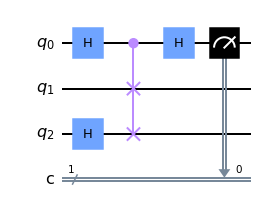

In [59]:
# Let's plot the circuit to make sure it is correct
swap_test().draw('mpl')

In [61]:
# Run experiment 1000 times
job = qk.execute(swap_test(), backend=sim_backend, shots=1000)

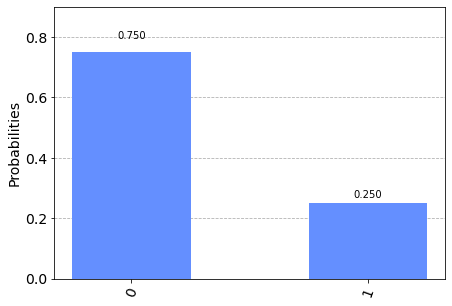

In [62]:
# Plot results
results = job.result()
plot_histogram(results.get_counts())

# Problem 3 (d)

## Example

In [64]:
# Create an empty noise model
noise_model = NoiseModel()

# Add depolarizing error to the hadamard gates
p = 0.001 # probability of depolarization
error = depolarizing_error(p, 1)
noise_model.add_all_qubit_quantum_error(error, ['h'])

In [65]:
shots = 1000

job = qk.execute(swap_test(), backend=sim_backend, shots=shots, noise_model=noise_model) # Execute job

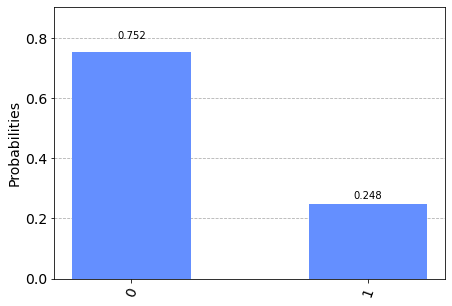

In [66]:
# Plot results
results = job.result()
plot_histogram(results.get_counts())

## $P_0$ as a function of the probability of depolarizing

In [89]:
'''
Insert code for creating two lists:
    1) depol_prob: a list of depolarization probabilities from 1e-4 to 1 (consider at least 25 values of p)
    2) p0_data: a list containing the resulting probability of the first qubit (qubit 0) being in the |0> 
    state for each depolarization probability
'''
circ=swap_test()
depol_prob = np.linspace(10**-4, 1,100)
p0_data=[]
for i in depol_prob:
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(depolarizing_error(i, 1), ['h'])
    job = qk.execute(circ.copy(), backend=sim_backend, shots=shots, noise_model=noise_model)
    p0_data.append((job.result().get_counts()['0']/1000))

Text(0.5, 0, 'Probability of Depolarizing')

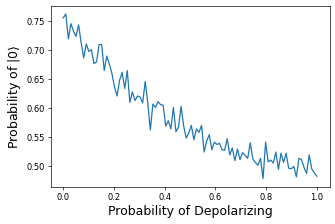

In [90]:
fig = plt.figure(dpi=60)
ax = fig.add_subplot(111)
ax.plot(depol_prob, p0_data)
ax.set_ylabel(r'Probability of $|0\rangle$', fontsize=15)
ax.set_xlabel(r'Probability of Depolarizing', fontsize=15)

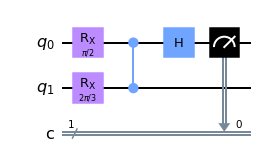

In [122]:
import math
num_qubits = 2
num_meas_qubits = 1
circ = qk.QuantumCircuit(num_qubits, num_meas_qubits)

circ.rx(2*math.pi/3,1)
circ.rx(math.pi/2,0)
#circ.h(0)
circ.cz(0,1)
circ.h(0)
circ.measure(0,0)
circ.draw('mpl')

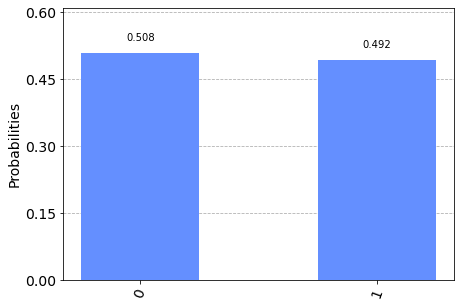

In [123]:
job = qk.execute(circ, backend=sim_backend, shots=10000)
plot_histogram(job.result().get_counts())